In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
estados = ['California','New_Jersey', 'Florida', 'Illinois'] # Datasets usados para el estudio

In [ ]:
ruta_google = './datasets/Google Maps' # Ruta en maps de Google

In [ ]:
metadata_google = pd.read_csv('datasets/Google Maps/metadata-sitios/all_in_one_limpio.csv.gz',compression='gzip') # metadata google

In [ ]:
df_state = pd.DataFrame()

for estado in estados: # Cargo todos los estados seleccionados
    df = pd.read_parquet(f'{ruta_google}/reviews-estados/review-{estado}/all_{estado}.parquet')
    df_state = pd.concat([df_state, df], ignore_index=True)



In [502]:
metadata_google['gmap_id'].value_counts()

gmap_id
0x88f16e41928ff687:0x883dad4fd048e8f8    1
0x89b172d7cd5f99c9:0xb9c98d1590353d73    1
0x885012dfaaaaaaab:0x9b81e9d61201235f    1
0x87e52be90f69612f:0x1037cc91f973d725    1
0x89b116c98b9b226d:0xa376c6e55227a85e    1
                                        ..
0x88389358440dd323:0x396b680f2cb11922    1
0x89dfce343c0f02df:0x8a38b0546884900a    1
0x87f6341deeec8b0f:0x1f2e5ed1bd7099ce    1
0x87da82dc3c4d82a3:0xa098d57aac6cac3d    1
0x54956b3944b1654d:0x7797cead9a485c22    1
Name: count, Length: 2970366, dtype: int64

In [501]:
metadata_google.drop_duplicates(subset='gmap_id',inplace=True)

In [554]:
#Uno estados con metadados y y agrupo para los restaurantes los que sean de una categoria especifica y agrupo por añs
category= 'Fast food'
df_full = pd.merge(df_state[['gmap_id','user_id','time','rating']],metadata_google[['gmap_id','category','Estado_Perteneciente']],on='gmap_id',how='inner')
df_full = df_full[df_full['category'].str.contains('Restaurant')]
df_group = df_full.groupby(['Estado_Perteneciente']).agg({
    'time':'min',
    'category':'first',
    'user_id':'count'
    }).reset_index()
df_group_cat = df_group[df_group['category'].str.contains(category)]
grouped_by_year_name = df_group_cat.groupby(['Estado_Perteneciente',df_group_cat['time'].dt.year]).agg({
    'user_id': 'count'
}).reset_index()

Usuarios por Estado

In [504]:
grouped_by_year_name.rename(columns={'name':'cantidad'},inplace=True)
grouped_by_year_name = grouped_by_year_name[grouped_by_year_name['time']>=2017]

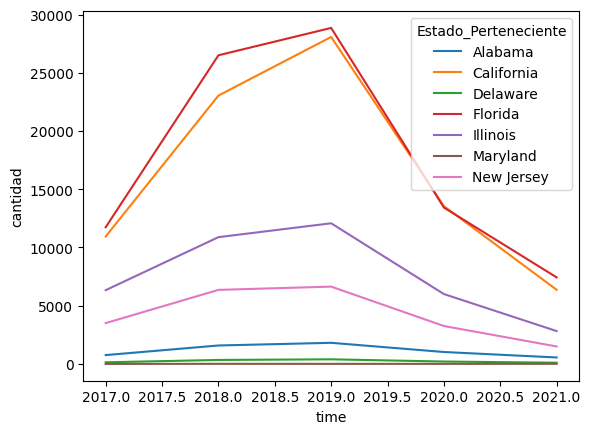

In [505]:
sns.lineplot(data=grouped_by_year_name,x='time',y='cantidad',hue='Estado_Perteneciente')
plt.show()

In [493]:
# Aparecieron estados que no estaban en la lista